In [1]:
import sys
import os
import glob
import re 
import pandas as pd
import numpy as np
from lxml import etree
import requests
import time
from collections import Counter
import shutil

In [2]:
sys.path.append(os.path.abspath("C:/Users/calvotello/Dropbox/MTB/Göttingen/research/"))
sys.path.append(os.path.abspath("./../../"))


In [3]:
from librarian_robot import downloading_datasets, map_classications_systems, tokenize



In [4]:
df = pd.read_parquet("./../data/1980_2019_data_joined.parquet")


In [5]:
df

,medium,title,title_supplement,year,entry_first,author_first_name,author_last_name,author_gnd_id,editor_first_name,editor_last_name,...,GOK_ppn,GOK_notation,GOK_j,signatur_place,signatur,signatur_date,Abrufzeichen,query,romance_studies,joined_column
ppn,,,,,,,,,,,,,,,,,,,,,
727067974,Aau,Glossario arabo-italiano (lingua moderna),None,1980,3496:09-10-12,Giovanni,Canova,None,None,None,...,None,None,None,None,RON 348,09-10-12,None,pica_jah_1980,1.0,Arabisch|Italienisch
723420874,Oax,History in the Text 'Quatrevingt-Treize' and t...,None,1980,2045:31-08-12,Sandy,Petrey,None,None,None,...,None,None,None,None,Online-Ressource,15-07-15,OLR-EBL,pica_jah_1980,1.0,"The title of this study ""History in the text"" ..."
723395780,Oax,Italic and Romance,Linguistic studies in honor of Ernst Pulgram,1980,2045:31-08-12,Herbert J.,Izzo,None,None,None,...,None,None,None,None,Online-Ressource|ProQuest Academic Complete|Pr...,28-04-20|11-08-20|15-07-15|01-06-20|18-04-21|1...,olr-mieteebc|Proquest-AcadCompl|OLR-EBL,pica_jah_1980,1.0,Linguistic studies in honor of Ernst Pulgram| ...
607035692,Aau,Din stihurile jupînului François Villon,None,1980,0001:17-08-09,François,Villon,079415202,Alexandru|Romulus|Val,Alexianu|Vulpescu|Munteanu,...,None,None,None,1:HDRMAG,"4""@27 ZZ 760",17-08-09,None,pica_jah_1980,1.0,Übersetzung|Rumänisch|Lyrik
388767014,Aau,The @horror of life,None,1980,3054:11-06-04,Roger L.,Williams,1233577956,Roger Lawrence,Williams,...,None,None,None,BBK-ROM,Fr.L.19.J. 716|GE 81/947|82-3575|frz 930.30:a5...,11-06-04|01-02-95|23-12-98|01-01-85,None,pica_jah_1980,1.0,Sonstige| Französisch|Literatur|Pessimismus|De...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644730073,Aau,Soluzioni,a practical grammar of contemporary Italian,2019,KNUB:23-11-18,Denise,De Rôme,None,None,None,...,None,None,None,None,None,23-11-18,None,pica_jah_2019,1.0,a practical grammar of contemporary Italian| R...
1644599279,Aau,Les @grammairiens italiens face à leur langue ...,None,2019,KNUB:22-11-18,Laurent,Vallance,1680803417,None,None,...,621838306|621838357,IN 321|IN 330,Historische Sprachwissenschaft. Sprachgeschich...,2|SUB|J 28|FMAG|BBK-ROM|28/BB2-SLW|4000|Freihand,10 A 79992|A/753562|ROM:SJ:633:Val::2019|2019 ...,10-11-20|07-01-20|10-12-19|06-02-20|07-01-20|2...,ACQ,pica_jah_2019,1.0,Beihefte zur Zeitschrift für romanische Philol...
1644542471,Aau,Romance phonetics and phonology,None,2019,KNUB:21-11-18,None,None,None,Mark|Juana,Gibson|Gil Fernández,...,None,None,None,E03|FBL,a rom 011.5 mb/499|FA/255/1212|Rom X 06/Rom 3,22-11-19|31-07-19|25-04-19|21-11-18|14-07-21,None,pica_jah_2019,1.0,Phonologie| Romanische Sprachen|Phonetik|Phono...


In [6]:
df.columns.tolist()[0:20]

['medium',
 'title',
 'title_supplement',
 'year',
 'entry_first',
 'author_first_name',
 'author_last_name',
 'author_gnd_id',
 'editor_first_name',
 'editor_last_name',
 'editor_gnd_id',
 'isbn',
 'ILNs',
 'content_type_ppn',
 'content_type',
 'publisher',
 'language_text',
 'language_original',
 'pages',
 'comment_isbn']

In [7]:
df.columns.tolist()[20:40]

['issn',
 'comment_issn',
 'place_publication',
 'summary',
 'title_continuing_resource',
 'work_ppn',
 'work_info',
 'work_title',
 'expression_ppn',
 'expression_info',
 'expression_title',
 'DDC_notation',
 'DDC_sachgruppe',
 'DDC_grundnotation',
 'BK_ppn',
 'BK_notation',
 'BK_j',
 'RVK_ppn',
 'RVK_notation',
 'RVK_j']

In [8]:
df.columns.tolist()[40:60]

['RVK_k',
 'keyword_ppn',
 'keyword',
 'keyword_loc_ppn',
 'keyword_loc',
 'lcc_notation',
 'klassifikationssystem_system',
 'klassifikationssystem_notation',
 'uri_description',
 'uri',
 'GOK_ppn',
 'GOK_notation',
 'GOK_j',
 'signatur_place',
 'signatur',
 'signatur_date',
 'Abrufzeichen',
 'query',
 'romance_studies',
 'joined_column']

In [9]:
df["BK_notation"]

ppn
727067974           18.74|18.25
723420874                  None
723395780                  None
607035692           18.23|17.97
388767014                  None
                    ...        
1644730073                 None
1644599279          18.26|17.15
1644542471          18.20|17.53
1643642936          17.63|18.31
1643621785    18.23|17.81|17.73
Name: BK_notation, Length: 366143, dtype: object

In [10]:
df["BK_notation"].isna().sum()

177009

In [11]:
labels_df = tokenize.tokenize_column(df, "BK_notation", reg_ex = r"(?u)\b\d\d\.\d\d\b", max_features = 3000)


Shape of tokens:  (366143, 1329)
Shape of tokens after filtering:  (366143, 1329)


In [12]:
labels_df

,17.97@BK_notation,18.23@BK_notation,18.32@BK_notation,18.27@BK_notation,18.33@BK_notation,18.37@BK_notation,18.22@BK_notation,17.93@BK_notation,18.31@BK_notation,18.34@BK_notation,...,74.41@BK_notation,74.28@BK_notation,73.87@BK_notation,74.17@BK_notation,74.15@BK_notation,74.03@BK_notation,73.99@BK_notation,43.63@BK_notation,73.89@BK_notation,43.02@BK_notation
727067974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
723420874,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
723395780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
607035692,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
388767014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644730073,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1644599279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1644542471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1643642936,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
labels_df = labels_df.astype(bool).astype(int)

In [14]:
labels_df

,17.97@BK_notation,18.23@BK_notation,18.32@BK_notation,18.27@BK_notation,18.33@BK_notation,18.37@BK_notation,18.22@BK_notation,17.93@BK_notation,18.31@BK_notation,18.34@BK_notation,...,74.41@BK_notation,74.28@BK_notation,73.87@BK_notation,74.17@BK_notation,74.15@BK_notation,74.03@BK_notation,73.99@BK_notation,43.63@BK_notation,73.89@BK_notation,43.02@BK_notation
727067974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
723420874,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
723395780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
607035692,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
388767014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644730073,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1644599279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1644542471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1643642936,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


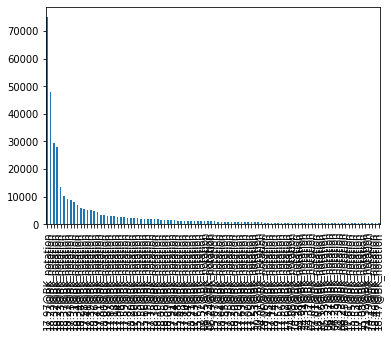

In [15]:
labels_df.sum().iloc[0:100].plot.bar()

In [16]:
labels_df.to_parquet("./../data/1980_2019_labels.parquet")

In [17]:
joined_df = pd.merge(df, labels_df, left_index= True, right_index= True)

In [18]:
joined_df

,medium,title,title_supplement,year,entry_first,author_first_name,author_last_name,author_gnd_id,editor_first_name,editor_last_name,...,74.41@BK_notation,74.28@BK_notation,73.87@BK_notation,74.17@BK_notation,74.15@BK_notation,74.03@BK_notation,73.99@BK_notation,43.63@BK_notation,73.89@BK_notation,43.02@BK_notation
727067974,Aau,Glossario arabo-italiano (lingua moderna),None,1980,3496:09-10-12,Giovanni,Canova,None,None,None,...,0,0,0,0,0,0,0,0,0,0
723420874,Oax,History in the Text 'Quatrevingt-Treize' and t...,None,1980,2045:31-08-12,Sandy,Petrey,None,None,None,...,0,0,0,0,0,0,0,0,0,0
723395780,Oax,Italic and Romance,Linguistic studies in honor of Ernst Pulgram,1980,2045:31-08-12,Herbert J.,Izzo,None,None,None,...,0,0,0,0,0,0,0,0,0,0
607035692,Aau,Din stihurile jupînului François Villon,None,1980,0001:17-08-09,François,Villon,079415202,Alexandru|Romulus|Val,Alexianu|Vulpescu|Munteanu,...,0,0,0,0,0,0,0,0,0,0
388767014,Aau,The @horror of life,None,1980,3054:11-06-04,Roger L.,Williams,1233577956,Roger Lawrence,Williams,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644730073,Aau,Soluzioni,a practical grammar of contemporary Italian,2019,KNUB:23-11-18,Denise,De Rôme,None,None,None,...,0,0,0,0,0,0,0,0,0,0
1644599279,Aau,Les @grammairiens italiens face à leur langue ...,None,2019,KNUB:22-11-18,Laurent,Vallance,1680803417,None,None,...,0,0,0,0,0,0,0,0,0,0
1644542471,Aau,Romance phonetics and phonology,None,2019,KNUB:21-11-18,None,None,None,Mark|Juana,Gibson|Gil Fernández,...,0,0,0,0,0,0,0,0,0,0
1643642936,Aau,Nationale Identitätskonstruktionen in Argentinien,Pressediskurse in Zeiten der Krise,2019,MAUB:25-10-18,Simone Maria,Mwangi,1663308705,None,None,...,0,0,0,0,0,0,0,0,0,0


In [19]:
joined_df

,medium,title,title_supplement,year,entry_first,author_first_name,author_last_name,author_gnd_id,editor_first_name,editor_last_name,...,74.41@BK_notation,74.28@BK_notation,73.87@BK_notation,74.17@BK_notation,74.15@BK_notation,74.03@BK_notation,73.99@BK_notation,43.63@BK_notation,73.89@BK_notation,43.02@BK_notation
727067974,Aau,Glossario arabo-italiano (lingua moderna),None,1980,3496:09-10-12,Giovanni,Canova,None,None,None,...,0,0,0,0,0,0,0,0,0,0
723420874,Oax,History in the Text 'Quatrevingt-Treize' and t...,None,1980,2045:31-08-12,Sandy,Petrey,None,None,None,...,0,0,0,0,0,0,0,0,0,0
723395780,Oax,Italic and Romance,Linguistic studies in honor of Ernst Pulgram,1980,2045:31-08-12,Herbert J.,Izzo,None,None,None,...,0,0,0,0,0,0,0,0,0,0
607035692,Aau,Din stihurile jupînului François Villon,None,1980,0001:17-08-09,François,Villon,079415202,Alexandru|Romulus|Val,Alexianu|Vulpescu|Munteanu,...,0,0,0,0,0,0,0,0,0,0
388767014,Aau,The @horror of life,None,1980,3054:11-06-04,Roger L.,Williams,1233577956,Roger Lawrence,Williams,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644730073,Aau,Soluzioni,a practical grammar of contemporary Italian,2019,KNUB:23-11-18,Denise,De Rôme,None,None,None,...,0,0,0,0,0,0,0,0,0,0
1644599279,Aau,Les @grammairiens italiens face à leur langue ...,None,2019,KNUB:22-11-18,Laurent,Vallance,1680803417,None,None,...,0,0,0,0,0,0,0,0,0,0
1644542471,Aau,Romance phonetics and phonology,None,2019,KNUB:21-11-18,None,None,None,Mark|Juana,Gibson|Gil Fernández,...,0,0,0,0,0,0,0,0,0,0
1643642936,Aau,Nationale Identitätskonstruktionen in Argentinien,Pressediskurse in Zeiten der Krise,2019,MAUB:25-10-18,Simone Maria,Mwangi,1663308705,None,None,...,0,0,0,0,0,0,0,0,0,0


In [20]:
joined_df.title.sample(50)

726330175                                          Roger Nimier
60183643X              Langenscheidt Handwörterbuch Französisch
273243136                             Printemps chez des ombres
336908776                                    Realtà del simbolo
1612886167                                        Materia Prima
1113442859                                                 None
1356039170                                              Índices
1604397497                                               À lire
1097153851                                        Oh, Serafina!
272336289                     Les @Gommes d'Alain Robbe-Grillet
039971600                                      Ensayos criticos
616073704                                           Ausser Atem
1611391679                             Laclos et le libertinage
1614122652    Jean Baudrillard: from hyperreality to disappe...
366669974                        Cuentos para leer a escondidas
1603045236                    Les @céfra

In [21]:
joined_df.to_parquet("./../data/1980_2019_data_labels.parquet")